## 1.6 Exam vB, PROBLEM 1  
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: **downtown**, **the suburbs**, and **the countryside**,  
however there is always the possibility the truck breaks down and it goes to the **workshop**.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop
---|---|---|---|---
Downtown | 0.3 | 0.7 | 0 | 0
Suburbs | 0.2 | 0.5 | 0.3 | 0
Countryside | 0 | 0 | 0.5 | 0.5
Workshop | 0 | 0 | 0 | 1

1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? **[2p]**

2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? **[2p]**

3. Is this Markov chain irreducible? Explain your answer. **[3p]**

4. What is the stationary distribution? Furthermore is it reversible? (Explain your answer) **[3p]**

5. **Advanced question:** What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop?

   *Hint:* to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50.  
   Motivate your answer in detail. **[4p]**

   You could also solve this question by simulation, but this gives you a maximum of **[2p]**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [5]:
# Part 1
P = np.array([[0.3, 0.7, 0, 0], [0.2, 0.5, 0.3, 0], [0, 0, 0.5, 0.5], [0, 0, 0, 1]])

P10 = np.linalg.matrix_power(P, 10)

print("This is the matrix after 10 time steps: \n ", P10)
probability = P10[0, 2].round(4)
print("This is probability from Downtown to countryside after 10 time steps: ", probability)
problem1_p1 = probability

This is the matrix after 10 time steps: 
  [[3.39352311e-02 8.26829080e-02 8.48735349e-02 7.98508326e-01]
 [2.36236880e-02 5.75589191e-02 5.96851134e-02 8.59132280e-01]
 [0.00000000e+00 0.00000000e+00 9.76562500e-04 9.99023438e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]
This is probability from Downtown to countryside after 10 time steps:  0.0849


2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? **[2p]**



In [6]:
# Part 2
# Fill in the answer to part 2 below



problem1_p2 = 0.79


### 1.7 Part 3
Double click this cell to enter edit mode and write your answer for part 3 below this line.


3. Is this Markov chain irreducible? Explain your answer. **[3p]**



In [7]:
# Part 3
# Fill in the answer to part 3 below as a boolean

# Chain is irreducible if we can go from each state to every other state and back to start state.
# This is not true for this markov chain, meaning the answer is False. 
problem1_irreducible = False


4. What is the stationary distribution? Furthermore is it reversible? (Explain your answer) **[3p]**



In [8]:
# Below is the code for finding the stationary distribution for any Markov valid Markov chain:

# This stationary distribution fiunction could also work, just not always the same and correct way:
def stationary_distribution(P):
    """
    Computes the stationary distribution of a Markov chain
    by finding the eigenvector corresponding to eigenvalue 1.
    """
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    
    # Find the eigenvector associated with eigenvalue 1
    idx = np.argmin(np.abs(eigenvalues - 1))
    vec = np.real(eigenvectors[:, idx])
    
    # Normalize to sum to 1
    stationary = vec / np.sum(vec)
    return stationary



In [10]:
# This is a function that checks the reversibility of a Markov chain!

# Code for checking reversibility for ANY matrix!:

def is_reversible(P, stationary_dist, tol=1e-12):
    n = P.shape[0]
    for i in range(n):
        for j in range(n):
            left = stationary_dist[i] * P[i,j]
            right = stationary_dist[j] * P[j,i]
            if not np.isclose(left, right, atol=tol):
                return False
    return True


In [11]:
# Part 4
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = stationary_distribution(P)
print("This is the stationary distribution: ", problem1_stationary)


problem1_reversible = is_reversible(P, problem1_stationary)
print("Is it reversible: ", problem1_reversible)


This is the stationary distribution:  [0. 0. 0. 1.]
Is it reversible:  True


## Part 4
Double click this cell and write your motivation below this line


### 2.1 Part 5
Double click this cell to enter edit mode and write your answer for part 5 below this line.


5. **Advanced question:** What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop?

   *Hint:* to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50.  
   Motivate your answer in detail. **[4p]**

   You could also solve this question by simulation, but this gives you a maximum of **[2p]**.

In [12]:
# This function finds the expected hitting time of any matrix! 

def expected_hitting_time(P, target_states, start_state=None, start_dist=None):
    """
    Compute expected hitting times to a given set of target states in a finite Markov chain.

    Parameters
    ----------
    P : np.ndarray, shape (n, n)
        Transition matrix of the Markov chain.
    target_states : iterable of int
        Indices of the target states.
    start_state : int, optional
        If provided, return the expected hitting time starting from this state.
    start_dist : array-like, shape (n,), optional
        If provided, return the expected hitting time under this initial distribution.

    Returns
    -------
    float or np.ndarray
        - If start_state is given: expected hitting time from that state.
        - If start_dist is given: expected hitting time under that distribution.
        - If neither is given: array h of length n with expected hitting times
          from all states (targets have value 0).

    Notes
    -----
    This solves the linear system

        (I - Q) h_S = 1

    where Q is the submatrix of P restricted to non-target states,
    and 1 is a vector of ones. Assumes that the target set is hit
    with probability 1 from the relevant starting states.
    """
    P = np.asarray(P, dtype=float)
    n = P.shape[0]

    target_states = np.array(sorted(set(target_states)), dtype=int)
    all_states = np.arange(n, dtype=int)

    # Non-target states S
    non_target_states = np.array([s for s in all_states if s not in target_states], dtype=int)

    # If all states are targets, hitting time is identically zero
    if non_target_states.size == 0:
        h = np.zeros(n, dtype=float)
        if start_state is not None:
            return float(h[start_state])
        if start_dist is not None:
            start_dist = np.asarray(start_dist, dtype=float)
            return float(start_dist @ h)
        return h

    # Build Q and solve (I - Q) h_S = 1
    Q = P[np.ix_(non_target_states, non_target_states)]
    I = np.eye(Q.shape[0])
    ones = np.ones(Q.shape[0])

    # Solve for h_S
    h_S = np.linalg.solve(I - Q, ones)

    # Put back into full vector h of length n
    h = np.zeros(n, dtype=float)
    h[target_states] = 0.0
    for idx, s in enumerate(non_target_states):
        h[s] = h_S[idx]

    # Return according to user request
    if (start_state is not None) and (start_dist is not None):
        raise ValueError("Provide either start_state or start_dist, not both.")

    if start_state is not None:
        return float(h[start_state])

    if start_dist is not None:
        start_dist = np.asarray(start_dist, dtype=float)
        if start_dist.shape[0] != n:
            raise ValueError("start_dist must have length equal to number of states.")
        return float(start_dist @ h)

    return h


In [18]:
# Part 5
# Fill in the answer to part 5 below
# That is, the expected number of steps

# Starting from Downtown, target state is workshop 

# Expected steps until first time in workshop (state 3) starting from Downtown (state 0)
ET_downtown_to_workshop = expected_hitting_time(P, target_states=[3], start_state=0)
ET_rounded = round(ET_downtown_to_workshop, 2)
print("This is the expected hitting time: ", ET_rounded)

problem1_ET = ET_rounded


This is the expected hitting time:  7.71


---------

## 2.2 Exam vB, PROBLEM 2  
Maximum Points = 13  

You are given a “Data Science Salaries” dataset found in `data/salaries.csv`, which contains  
employment information of data scientists up to 2023 and the salary obtained.  
Your task is to train a linear regression model to predict the salary of a data scientist  
based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set.  
You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level:  
- 0 = Entry Level  
- 1 = Mid Level  
- 2 = Senior Level  
- 3 = Executive Level  

Employment type:  
- 0 = Part Time  
- 1 = Full Time  
- 2 = Contractor  
- 3 = Freelancer  

1. Load the data into a pandas dataframe `problem2_df`.  
   Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. **[1p]**

2. Split the data into train and test. **[1p]**

3. Train the model. **[1p]**

4. Come up with a reasonable metric and compute it.  
   Provide plots that show the performance of the model.  
   Reason about the performance. **[4p]**

5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio.  
   Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model,  
   would a higher remote ratio result in a higher predicted salary or vice versa? **[3p]**

6. **Advanced question:** On the test set, plot the empirical distribution function of the residual  
   with confidence bands (i.e. using the DKW inequality and 95% confidence).  
   What does the confidence band tell us?  
   What can the confidence band be used for? **[3p]**


1. Load the data into a pandas dataframe `problem2_df`.  
   Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. **[1p]**



In [20]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv("data/salaries.csv")
problem2_df.head(5)
problem2_df.columns


Index(['work_year', 'experience_level', 'employment_type', 'salary_in_usd',
       'remote_ratio'],
      dtype='object')

In [21]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem2_features = ["work_year", "experience_level", "employment_type","remote_ratio"]

# Fill in the target as a string with the correct column name
problem2_target = "salary_in_usd"


2. Split the data into train and test. **[1p]**


In [24]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(
    X, 
    y, 
    random_state=42, 
    train_size=0.8)


3. Train the model. **[1p]**



In [25]:
# Part 3
# Include the necessary imports
# Initialize your linear regression model
model = LinearRegression()
model.fit(problem2_X_train, problem2_y_train)
problem2_model = model
# Train your model on the training data


### 2.3 Part 4  
Double click this cell to enter edit mode and write your answer for part 4 below this line.


4. Come up with a reasonable metric and compute it.  
   Provide plots that show the performance of the model.  
   Reason about the performance. **[4p]**



## Interpretation of model performance

### Metric-based reasoning

The training MSE (≈ 3.10 × 10⁹) and test MSE (≈ 3.16 × 10⁹) are very close in magnitude. This indicates that the model generalizes reasonably well to unseen data and does not suffer from severe overfitting. The slightly higher test MSE is expected, as the test set contains unseen observations.

---

### Residual plot interpretation

From the residual plot, the residuals are roughly centered around zero, but their spread increases for larger predicted values. This indicates **heteroscedasticity**, meaning that the variance of the errors is not constant across the prediction range.

Additionally, there is no strong systematic curve in the residuals, suggesting that the model captures the general trend in the data. However, the increasing spread and presence of large positive and negative residuals indicate that the model struggles to accurately predict extreme values.

---

### True vs predicted plot interpretation

The true vs predicted plot shows that predictions are compressed into a relatively narrow range (approximately 100,000–160,000), while the true values span a much wider range. This indicates that the model **underestimates large target values and overestimates small ones**, a common sign of **underfitting**.

The fact that many points deviate significantly from the ideal diagonal line suggests that the model lacks sufficient flexibility to capture the full variability in the data.

---

### Overall conclusion

Overall, the model shows reasonable generalization performance but appears to underfit the data. While it captures the average trend, it fails to accurately predict extreme target values. This suggests that a more expressive model, additional features, or non-linear methods could potentially improve performance.


Train MSE: 3103548309.9614615
Test MSE: 3161126689.5785775
Train RMSE: 55709.49927939993
Test RMSE: 56223.89785116803


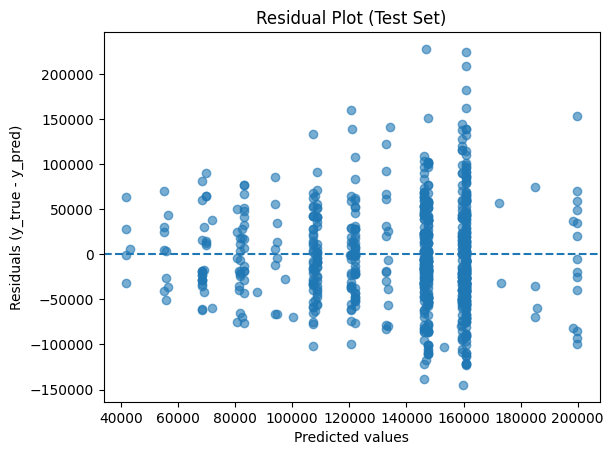

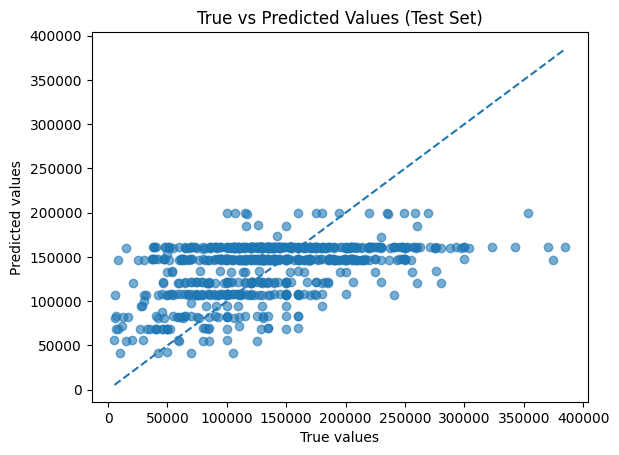

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predictions
y_train_pred = model.predict(problem2_X_train)
y_test_pred  = model.predict(problem2_X_test)

# Metrics
train_mse = mean_squared_error(problem2_y_train, y_train_pred)
test_mse  = mean_squared_error(problem2_y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse  = np.sqrt(test_mse)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Residual plot (test)
residuals = problem2_y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residual Plot (Test Set)")
plt.show()

# True vs predicted (test)
plt.scatter(problem2_y_test, y_test_pred, alpha=0.6)
plt.plot(
    [problem2_y_test.min(), problem2_y_test.max()],
    [problem2_y_test.min(), problem2_y_test.max()],
    linestyle='--'
)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted Values (Test Set)")
plt.show()


### 2.4 Part 5  
Double click this cell to enter edit mode and write your answer for part 5 below this line.


5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio.  
   Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model,  
   would a higher remote ratio result in a higher predicted salary or vice versa? **[3p]**



In [45]:
# Part 5
# Put the code for part 5 below this line

new_data = pd.DataFrame({
    "work_year": [2023],
    "experience_level": [1],   # Mid level
    "employment_type": [1],    # Full time
    "remote_ratio": [0]        # No remote work
})

new_data.head(3)

,work_year,experience_level,employment_type,remote_ratio
0,2023,1,1,0


In [47]:
# Part 5
# Use the trained model to predict the salary
problem2_predicted_salary = problem2_model.predict(new_data)[0]

print("Predicted salary:", problem2_predicted_salary)

# Check the coefficient for remote_ratio to understand its influence
remote_ratio_coef = problem2_model.coef_[problem2_features.index("remote_ratio")]   
print("Coefficient for remote_ratio:", remote_ratio_coef)

# Interpretation comment:
# If remote_ratio_coef > 0 => higher remote_ratio gives higher predicted salary.
# If remote_ratio_coef < 0 => higher remote_ratio gives lower predicted salary.



Predicted salary: 121940.38437091932
Coefficient for remote_ratio: -13.029475233542966


### 2.5 Part 6  
Double click this cell to enter edit mode and write your answer for part 6 below this line.


6. **Advanced question:** On the test set, plot the empirical distribution function of the residual  
   with confidence bands (i.e. using the DKW inequality and 95% confidence).  
   What does the confidence band tell us?  
   What can the confidence band be used for? **[3p]**

Number of test samples n = 751
DKW epsilon (95% band)  = 0.0496


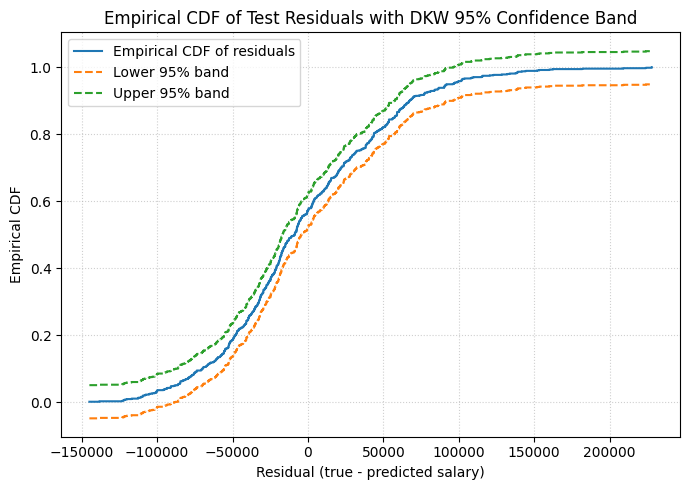

In [50]:
# Example code from the above:

# Part 6
# Put the code for part 6 below this line

import numpy as np
import matplotlib.pyplot as plt

# 1. Recompute predictions and residuals on the test set (for clarity)
y_test_true = problem2_y_test
y_test_pred = problem2_model.predict(problem2_X_test)
residuals_test = y_test_true - y_test_pred

# Number of test samples
n = len(residuals_test)

# 2. Sort residuals and build empirical CDF values
residuals_sorted = np.sort(residuals_test)
ecdf_values = np.arange(1, n + 1) / n  # k/n for k = 1,...,n

# 3. Compute epsilon using the DKW inequality for 95% confidence
alpha = 0.05
epsilon = np.sqrt((1.0 / (2.0 * n)) * np.log(2.0 / alpha))

# 4. Compute lower and upper confidence bands (clipped to [0, 1])
# lower_band = np.clip(ecdf_values - epsilon, 0.0, 1.0)
# upper_band = np.clip(ecdf_values + epsilon, 0.0, 1.0)
lower_band = (ecdf_values - epsilon)
upper_band = (ecdf_values + epsilon)

print(f"Number of test samples n = {n}")
print(f"DKW epsilon (95% band)  = {epsilon:.4f}")

# 5. Plot the empirical CDF and the confidence band
plt.figure(figsize=(7, 5))

# Empirical CDF as a step function
plt.step(residuals_sorted, ecdf_values, where="post", label="Empirical CDF of residuals")

# Confidence band as two lines
plt.step(residuals_sorted, lower_band, where="post", linestyle="--", label="Lower 95% band")
plt.step(residuals_sorted, upper_band, where="post", linestyle="--", label="Upper 95% band")

plt.xlabel("Residual (true - predicted salary)")
plt.ylabel("Empirical CDF")
plt.title("Empirical CDF of Test Residuals with DKW 95% Confidence Band")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.6)
plt.tight_layout()
plt.show()


### What the confidence band tells you (what you must write for points)

- With **95% confidence**, the **true residual CDF** $( F(r) )$ lies **within ±ε** of the empirical CDF $( \hat{F}_n(r) )$ **for all values of r simultaneously**. This is a *uniform* confidence bound provided by the DKW inequality.

- A **wider confidence band** indicates fewer test samples and therefore higher uncertainty in the estimated residual distribution, while a **narrower band** indicates more samples and lower uncertainty.

---

### What the confidence band can be used for

- To quantify uncertainty in the residual distribution **nonparametrically**, without assuming that residuals follow a specific distribution (e.g. normal).

- To analyze model error behavior with guaranteed bounds, for example:
  - Estimating the fraction of residuals greater than zero (model bias)
  - Estimating the probability of large prediction errors (tail risk), such as errors exceeding a certain threshold

- To assess whether the residual distribution is consistent with an expected or desired shape (informally), and to support conclusions such as “the residuals appear centered around zero” while accounting for uncertainty.


## 2.6 Exam vB, PROBLEM 3  
Maximum Points = 13  

### 2.7 Random variable generation

1. **[4p]** Using inversion sampling, construct 1000 samples from the below distribution  

$$
F[x] =
\begin{cases}
0, & x \le 0 \\
e^x - 1, & 0 < x < \ln(2) \\
1, & x \ge \ln(2)
\end{cases}
$$

2. **[2p]** Use the above 1000 samples to estimate the mean and variance.

3. **[4p]** Using the Accept–Reject sampler (Algorithm 1 in TFDS notes) construct 1000 samples  
   from the same distribution.  
   What proposal distribution did you choose and why?  
   What proportion of samples were accepted?

4. **[3p]** Explain if it is possible to sample from the density  

$$
f(x) = C e^{-(x^2 - 2)^2}
$$

using the Accept–Reject sampler (Algorithm 1 in TFDS notes) with sampling density  
given by the Gaussian.  
Here \( C \) is a constant to make sure that \( f \) is a density, and it is between roughly  
1.34 and 1.35.


In [ ]:
# Part 1
# Write your code below
# Part 1
# Put the resulting samples into the following variable
problem3_samples = XXX


In [ ]:
# Part 2
problem3_mean = XXX
problem3_variance = XXX


In [ ]:
# Part 3
# Write your code to solve the problem below

# Part 3
# Write your answer in this cell below
problem3_samples_accept_reject = XXX

# Put your answer for the proportion of samples accepted below
problem3_acceptance_rate = XXX


### 3 Part 3  
Double click this cell and write your answer for part 3 below,  
explain what proposal distribution you chose and why you can choose it.


### 4 Part 4  
Double click this cell and write your answer for part 4 below,  
explain if the Gaussian works as a proposal distribution for this density.
